# Task 4.9- Part 2 Intro to Data Visualisation with Python

## Step 1, 2 - importing Libraries and files

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing files
path = r'C:\Users\RUZANNA\OneDrive\Desktop\Careerfoundry\Python\Instacart Basket Anlysis-05.2023'

In [3]:
ords_prods_merged = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data',  'ords_prods_custom_merge.pkl'))

In [4]:
ords_prods_merged.shape

(30328763, 30)

In [5]:
ords_prods_merged.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_order,Frequency_flag,Gender,state,age,date_of_joined,number_of_dependents,family_status,income
0,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
ords_prods_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'busiest_day', 'price_range_loc', 'Busiest days',
       'Slowest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_order', 'Frequency_flag',
       'Gender', 'state', 'age', 'date_of_joined', 'number_of_dependents',
       'family_status', 'income'],
      dtype='object')

In [7]:
ords_prods_merged['order_hour_of_day'].value_counts()

10.0    2593725
11.0    2564597
14.0    2517238
15.0    2487586
13.0    2487500
12.0    2445841
16.0    2364969
9.0     2311334
17.0    1943858
8.0     1622394
18.0    1520954
19.0    1169224
20.0     910005
7.0      844665
21.0     746254
22.0     592432
23.0     375889
6.0      274801
0.0      203460
1.0      108110
5.0       82706
2.0       63961
4.0       49400
3.0       47860
Name: order_hour_of_day, dtype: int64

## Step 3

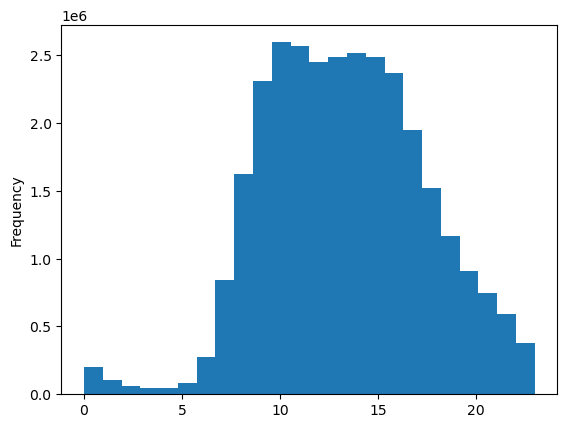

In [8]:
hist_order_hour_ofday = ords_prods_merged['order_hour_of_day'].plot.hist (bins =24) 

 The histogram illustrates the  frequency of the number of orders of Instacart received during the day, for different hours. The top five busiest hours are the following: 10,11,14,15,13. 

## Step 4

In [9]:
ords_prods_merged['loyalty_flag'].value_counts()

Regular customer    14797384
Loyal customer       9883583
New customer         5049538
High Spender          598258
Name: loyalty_flag, dtype: int64

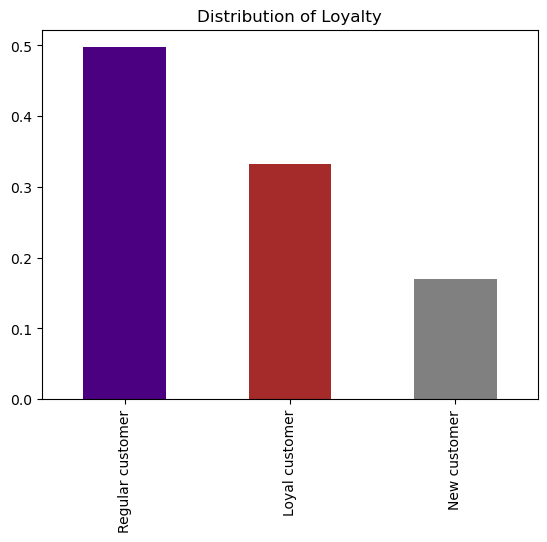

In [11]:
bar_loyalty = ords_prods_merged['loyalty_flag'].value_counts(normalize= True).plot( kind = 'bar', title = 'Distribution of Loyalty', color = ['indigo', 'brown', 'gray',  'teal'])

The largest group is regular customer and the smallest group is the group of high spenders. It should be important information for marketing department to develope the marketing campaigns.

<Axes: title={'center': 'Frequency of return of Loyal customers'}, xlabel='loyalty_flag'>

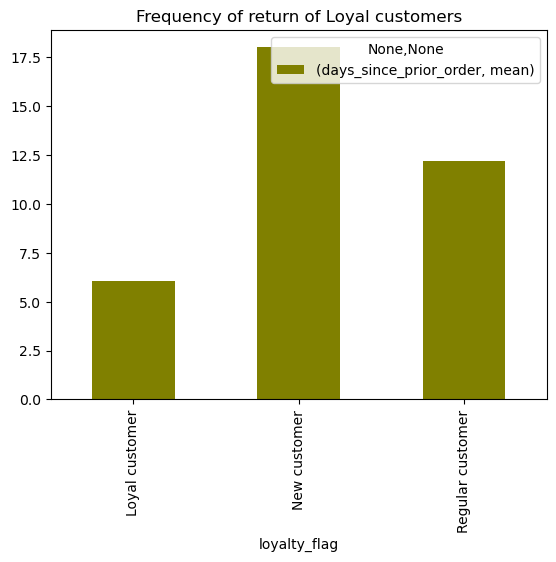

In [35]:
# loyalty statistics- how frequently loyal customers return (for excel report)
ords_prods_merged.groupby('loyalty_flag').agg({'days_since_prior_order':[ 'mean']}).plot(kind= 'bar', title = 'Frequency of return of Loyal customers', color = ['olive'])

<Axes: title={'center': 'Order habits of Loyal customers'}, xlabel='loyalty_flag'>

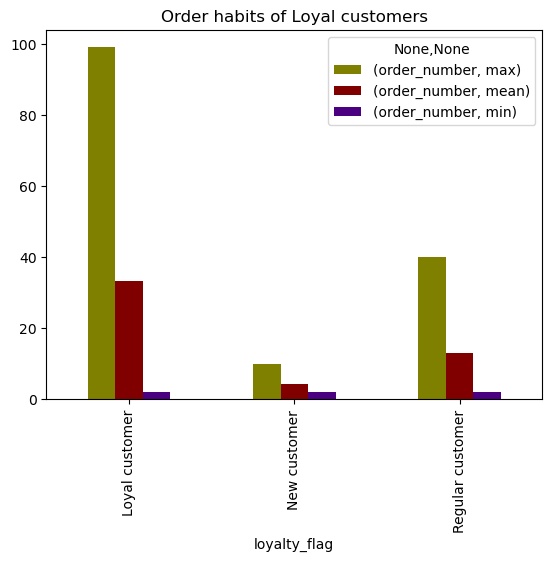

In [29]:
 #loyalty statistics- how frequently loyal customers order (for excel report)
ords_prods_merged.groupby('loyalty_flag').agg({'order_number':['max', 'mean', 'min']}).plot(kind= 'bar', title ='Order habits of Loyal customers', color = ['olive', 'maroon','indigo'])

## Step 5 *

* For further analysis I considered only the first one million rows, and created so called "representative" subset for the first one million raws. I tried to create the more accurate subset of data, but every time my computer has either crushed or been frozen. Unfortunetly at this moment I don't have other solutions.

In [11]:
df = ords_prods_merged[:1000000]

In [12]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7 

In [13]:
big = df[dev]
small = df[~dev]

In [14]:
big.shape

(699239, 33)

In [15]:
len(big)+len(small)

1000000

In [16]:
df_2 = big [['order_hour_of_day', 'prices']]

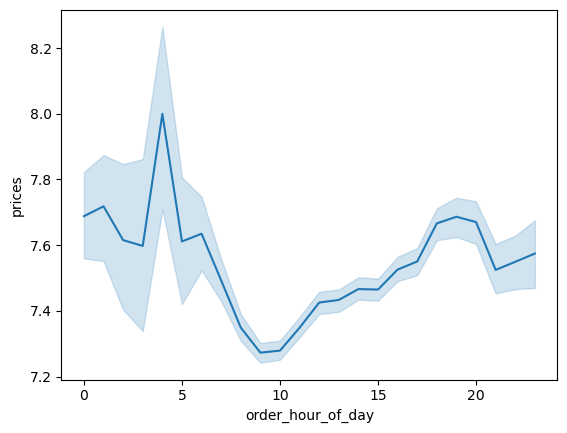

In [18]:
line_prices_order_hour = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

The prices are at the lowest level from 10 to 15. This probably explains why the busiest hours are from 10 to 15 hour of day.

## Step 6

In [19]:
df_family_status = big[['age', 'family_status']]

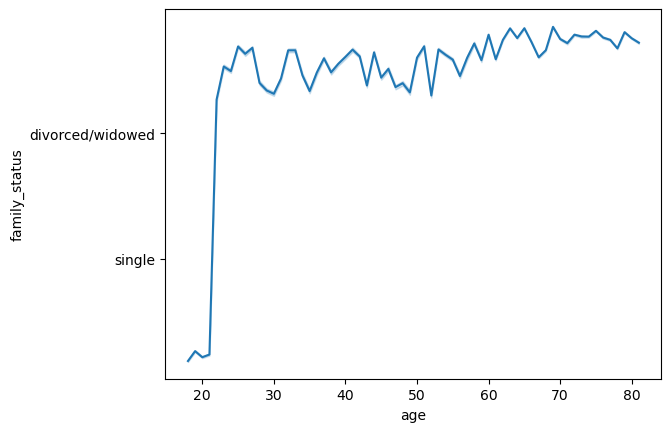

In [20]:
line_age_family_status = sns.lineplot(data= df_family_status, x = 'age', y = 'family_status')

It should be obvious that the majority of single group of population should be in their twenties and in their thirties the family status changes.

In [21]:
df_family = big [['age', 'number_of_dependents']]

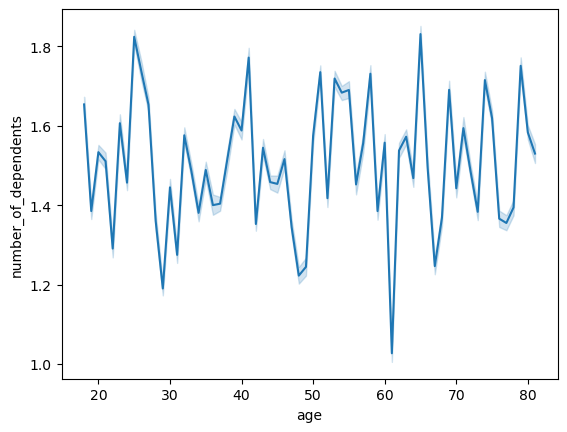

In [22]:
line_age_no_dependants = sns.lineplot(data = df_family, x = 'age',y = 'number_of_dependents')

The above graph doesn't show any connection between age and number of dependents. The line goes up and down for different age categories. Based on the above data it would be difficult to recommend with certainty the targeted group for marketing campaigns. We need additional data, but for the group category between 30 and 40 years old, the trend line is up., so we probably could recommend to focus on that group of clients. 

## Step7

<Axes: xlabel='age', ylabel='income'>

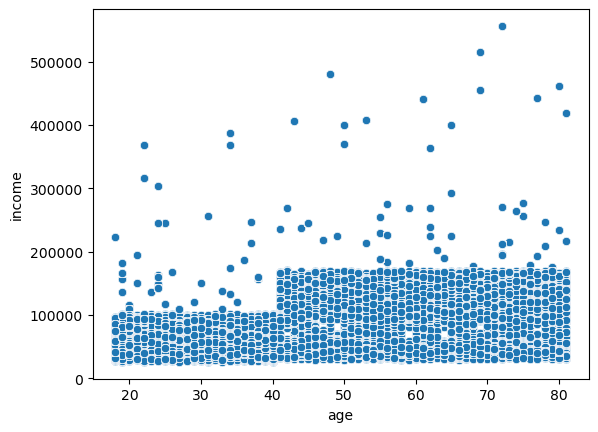

In [23]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = big)
scatterplot_age_income

There is no visible connection between income and age. Up to the age of 40 the prevailing level of income is 100000 and above the age of 40 years old the prevailing income is 200000.


## Step 8- Exporting  Scatterplot

In [24]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

In [26]:
line_age_no_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

In [27]:
line_age_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_family.png'))

In [28]:
line_prices_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order.png'))

In [12]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [30]:
hist_order_hour_ofday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))